In [9]:
#.........................神经网络
#.........................tf的更新使得该书的价值降低很多，【待补充】
# 人工神经网络（ANN）
# 单层感知器【以前理解的神经元，LTU：线性阈值】
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # 花瓣长度，宽度
y = (iris.target == 0).astype(np.int)
# sklearn提供了一个感知器类，以下实现了一个LTU网络。不输出概率
# 感知器学习算法类似于随机梯度下降
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

# 多层感知器（MLP）
# 单层有比较大的局限性，很多问题解决不了
# 输入层（变量）、隐含层（多个隐含层称为深度神经网络DNN）、输出层
# ReLU函数：hwb(x)=max(x*w+b,0)。虽然在0处不能求导，但是实践中效果还行
#...用tensorFlow高级API训练MLP
#...contri已经弃用，代码运行错误
# 两个隐含层，分别为300和100；激活函数是Relu，损失函数是交叉熵
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
import tensorflow as tf
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

AttributeError: module 'tensorflow._api.v2.compat.v1' has no attribute 'contrib'

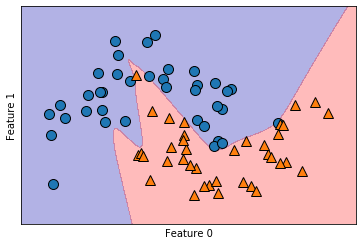

[[  0.66547159  -0.3319321    3.92990736  -4.58891074  -3.63946945
   -2.83707369 -15.33041999  21.36467923   4.33013233  -0.40011438]
 [  0.3074779   -0.35137409   4.42568112   3.04340946  -1.88840134
   -3.88014641  -3.28909137   5.32339793   3.72885235   0.4187297 ]]


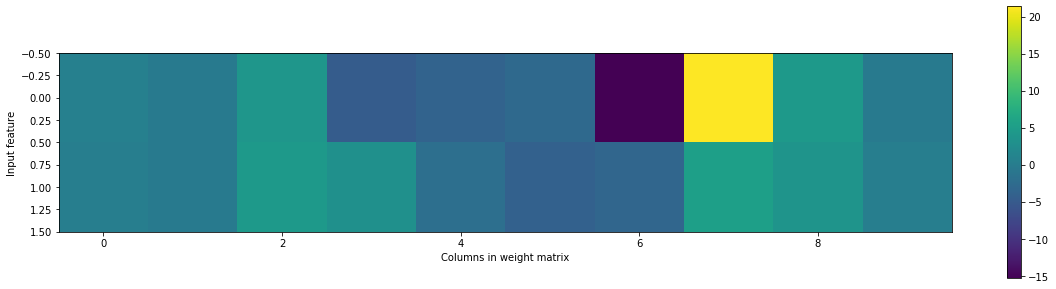

In [7]:
# 多层感知器（MLP）:sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
from matplotlib import pyplot as plt
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
# 热图
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
# plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
print(mlp.coefs_[0])

In [ ]:
# 参数：
# 隐含层，一般只需要1-2层即可
# 每层神经元数量，这个不确定，可以设置较多，然后采取早停法
# 激活函数：大多数情况可选择ReLU，效果较好且计算较快；对于回归任务，可以不用激活函数
# 由于tf的更新，原案例不适用，待补充

In [ ]:
# 深层神经网络
# 问题1：梯度消失（反向传播，层数过多时，梯度往往会越来越小，低层权重基本不变，达不到良好收敛）
# 问题2：梯度爆炸，某些情况下，梯度越来越大，算法发散，如循环神经网络
# 上述两个问题是激活函数导致的（文献支撑），S型函数效果不佳






